# 分别导入数据画图

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np

In [2]:
drop_num = 0
iter_num = 50
init_sample = 1

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl1' 
# datasets_1 = [   'standard_bo' ,   ] 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl1' 
# datasets_2 = ['aryl-2','aryl-4','aryl-7',]  
# label_sets =  [ 'Standard BO', 'Transfer BO 2', 'Transfer BO 4','Transfer BO 7',] 
# datasets_2 = ['aryl-2','aryl-3','aryl-4','aryl-5','aryl-6',] 
# datasets_2 = ['aryl-7','aryl-8','aryl-9','aryl-10',] 

# folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl5' 
# datasets_1 = [   'standard_bo' ,   ] 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl5' 
# datasets_2 = ['aryl-2','aryl-8','aryl-14',]  
# label_sets =  [ 'std-BO', 'tra-BO(2)', 'tra-BO(8)','tra-BO(14)',]
# datasets_2 = ['aryl-1','aryl-3','aryl-8','aryl-9','aryl-12','aryl-15',]  


# folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl9' 
# datasets_1 = [   'standard_bo' ,   ] 
# folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl9' 
# datasets_2 = ['aryl-2','aryl-8','aryl-14',]  
# label_sets =  [ 'Standard BO', 'Transfer BO 2', 'Transfer BO 8','Transfer BO 14',] 
# datasets_2 = ['aryl-2','aryl-4','aryl-8','aryl-11','aryl-13','aryl-14',]  

folder_path_1 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl15' 
datasets_1 = [   'standard_bo' ,   ] 
folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl\aryl15' 
datasets_2 = ['aryl-7','aryl-8','aryl-11',]  
label_sets =  [ 'Standard BO', 'Transfer BO 7', 'Transfer BO 8','Transfer BO 11',] 
# datasets_2 = ['aryl-3','aryl-5','aryl-7','aryl-8','aryl-10','aryl-11',]  








# label_sets =  datasets_1 + datasets_2
# label_sets =   datasets_2


eval_types = ['miny'] #  regret  Spearman  Edis  miny

def process_datasets(datasets, folder_path, eval_type, mean_datasets, std_datasets, last_columns_data):
    for eval_type in eval_types:
        for dataset in datasets:
            # 从 Excel 文件中读取数据
            file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
            df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
            
            df = -df  #转化为原始尺度
            
        # 找到最后一列的列名,删除最大最小行
            last_column = df.columns[-1]
            max_indices = df[last_column].nlargest(drop_num).index
            min_indices = df[last_column].nsmallest(drop_num).index
            df = df.drop(max_indices)
            df.reset_index(drop=True, inplace=True)
            df = df.drop(min_indices)
            df.reset_index(drop=True, inplace=True)

            # 计算均值并存储到列表中
            mean_data = df.mean()
            mean_datasets.append(mean_data)

            # 计算标准差并存储到列表中
            std_data = df.std()
            std_datasets.append(std_data)

            last_columns_data.append(df[last_column])
            
# 初始化列表
mean_datasets = []
std_datasets = []

last_columns_data = []
# 处理 datasets
# process_datasets(datasets_1, folder_path_1, eval_types, mean_datasets, std_datasets)
# process_datasets(datasets_2, folder_path_2, eval_types, mean_datasets, std_datasets)

process_datasets(datasets_1, folder_path_1,eval_types, mean_datasets, std_datasets, last_columns_data)
process_datasets(datasets_2, folder_path_2,eval_types, mean_datasets, std_datasets, last_columns_data)

# 优化曲线

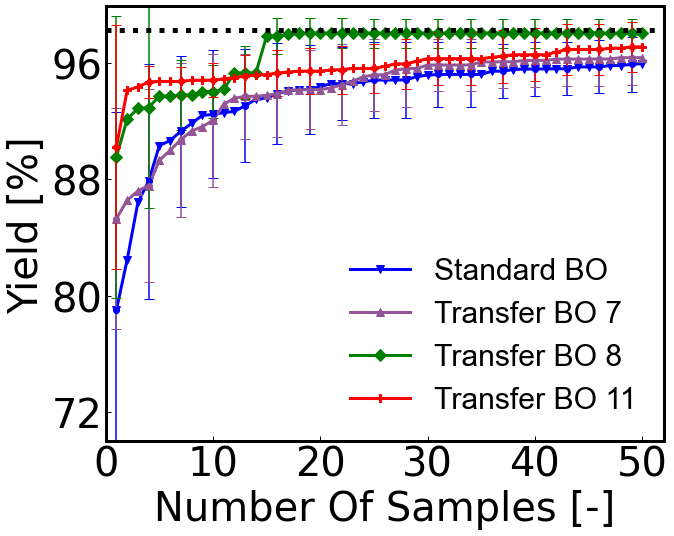

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 创建单个图形
plt.figure(figsize=(10, 8))

fontsize = 40

color_sets =  [  'blue', (147/255, 85/255, 150/255) ,'green',   'red',]
# color_sets =  [  'blue', 'green', ]
# color_1 = (147/255, 85/255, 150/255)
# color_2 = (116/255,160/255, 161/255)
# color_sets.append( color_1 )
# color_sets.append( color_2 )

# 循环导入每个数据集
for i, label in enumerate(label_sets):
    mean_data = mean_datasets[i]
    std_data = std_datasets[i]
    
    x_values = np.arange(0, len(mean_datasets[i])) + init_sample
    
    marker_styles = ['v', '^', 'D', 'P', 'x', '.', 'o', 's', '*',]
    line_styles = ['-', '-', '-', '-', '-', '-', '-', '-', '-',]
        
    line, = plt.plot( x_values, mean_datasets[i], label=label, marker=marker_styles[i], markersize=8,
                     linestyle=line_styles[i] ,linewidth= 3 ,color=color_sets[i] )  # ,color=color_sets[i]  i  ( 4 - i )

    # 设置每隔五个点标记一次，并标记最后一个点
    markers_num = list(range(0, len(mean_datasets[i]), 3)) 
    plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num],
                 fmt='o', capsize=5,color=line.get_color())
        

#     plt.plot(x_values, mean_data.values, label=label, 
#              marker=marker_styles[idx % len(marker_styles)], 
#              markeredgewidth=2, markerfacecolor='white',  # 这里设置了空心圆圈
#              linestyle=line_styles[idx % len(line_styles)],
#              markevery=2,color=color_sets[i])  # 每隔两个数据点进行标记
    
#     plt.fill_between(x_values, mean_data.values - std_data.values, mean_data.values + std_data.values, alpha=0.3,
#                      color=color_sets[i])

last_columns_data  = np.array(last_columns_data)
best_value = np.max(last_columns_data)
# print(best_value)

# y_min = np.nanmax(mean_datasets)
plt.axhline(best_value, color='black', linestyle=':', linewidth=5)

# plt.xlim(left=0, right=30)

plt.xlim(0, iter_num + init_sample + 1 )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

# plt.gca().set_yticks(np.arange(24, 49, 8))
# plt.gca().set_yticks(np.arange(69, 88, 6))
plt.ylim(70, 99.9) 
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(8))


plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
# plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Yield [%]', fontsize=fontsize)


plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

legend = plt.legend(loc='best', fontsize=30,frameon=False)  #, ncol=2
plt.setp(legend.get_texts(), fontname='Arial')
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

# 显示图形
plt.show()


# 找到全局最优比例和次数

98.29
每列包含最大值的个数： [12 17 38 21]
每列最大值的比例（%）： [30.  42.5 95.  52.5]


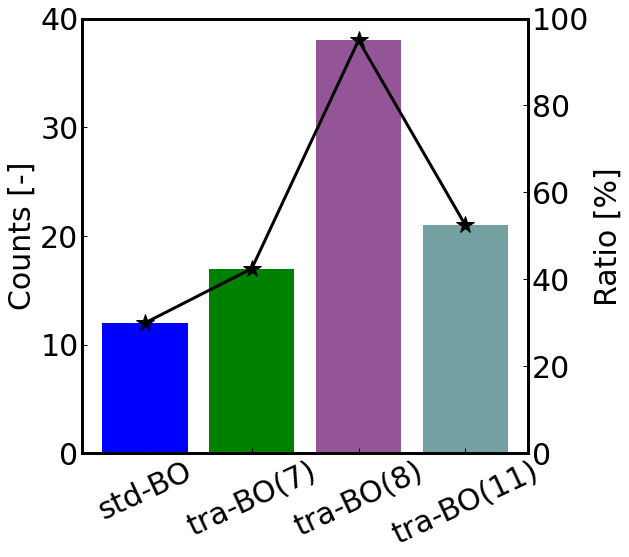

In [48]:
last_columns_data  = np.array(last_columns_data)
best_value = np.max(last_columns_data)
print(best_value)

# 计算每列包含最小值的个数
best_counts = np.sum(last_columns_data == best_value, axis=1)

# 计算每列最小值的比例
best_ratios = (best_counts / 40) * 100

# 打印结果
print("每列包含最大值的个数：", best_counts)
print("每列最大值的比例（%）：", best_ratios)

fontsize = 30

# 绘制双轴柱状图
fig, ax1 = plt.subplots(figsize=(8, 8))

# 绘制 best_counts 柱状图
bars = ax1.bar(label_sets[:len(best_counts)], best_counts, color=color_sets[:len(best_counts)], alpha=1)
# ax1.set_xlabel('Columns')
# ax1.set_ylabel('Min Counts', color='black')
ax1.tick_params(axis='y', labelcolor='black')

plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)
plt.ylabel('Counts [-]', fontsize=fontsize)
plt.ylim(0, 40,5)

ax1.set_xticks(range(len(label_sets[:len(best_counts)])))
ax1.set_xticklabels(label_sets[:len(best_counts)], rotation=25, ha='center')  


# 创建第二个y轴共享同一个x轴
ax2 = ax1.twinx()
ax2.plot(label_sets[:len(best_ratios)], best_ratios, color='black', marker='*',linewidth= 3,markersize=18,)
# ax2.set_ylabel('Min Ratios (%)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.ylabel('Ratio [%]', fontsize=fontsize)
plt.ylim(0, 100,10)

plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

# legend = plt.legend(loc='best', fontsize=fontsize,frameon=False)
# plt.setp(legend.get_texts(), fontname='Arial')

for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3
    
# 添加标题
# plt.title('Min Counts and Min Ratios per Column')

# 显示图形
plt.show()
            


# 权重画图

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# # # 二维函数优化

folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Aryl'  
datasets_2 = ['aryl-2','aryl-6','aryl-7', ]

label_sets =  [ 'traEI_a', 'traEI_b','traEI_c',] # 'RDM+EI', 'LHS+EI','SE+EI', 'SE+traEI_a', 
# label_sets =  datasets_1 + datasets_2
# label_sets =   datasets_2


eval_types = ['wt'] #  regret  Spearman  Edis  miny

def process_datasets(datasets, folder_path, eval_type, mean_datasets, std_datasets):
    for eval_type in eval_types:
        for dataset in datasets:
            # 从 Excel 文件中读取数据
            file_path = os.path.join(folder_path, f'{dataset}_{eval_type}.xlsx')
            df = pd.read_excel(file_path, header=0, usecols=range(iter_num))
            
            df = 1 - df

        # 找到最后一列的列名,删除最大最小行
            last_column = df.columns[-1]
            max_indices = df[last_column].nlargest(drop_num).index
            min_indices = df[last_column].nsmallest(drop_num).index
            df = df.drop(max_indices)
            df.reset_index(drop=True, inplace=True)
            df = df.drop(min_indices)
            df.reset_index(drop=True, inplace=True)

            # 计算均值并存储到列表中
            mean_data = df.mean()
            mean_datasets.append(mean_data)

            # 计算标准差并存储到列表中
            std_data = df.std()
            std_datasets.append(std_data)

# 初始化列表
mean_datasets = []
std_datasets = []

# 处理 datasets
# process_datasets(datasets_1, folder_path_1, eval_types, mean_datasets, std_datasets)
process_datasets(datasets_2, folder_path_2, eval_types, mean_datasets, std_datasets)


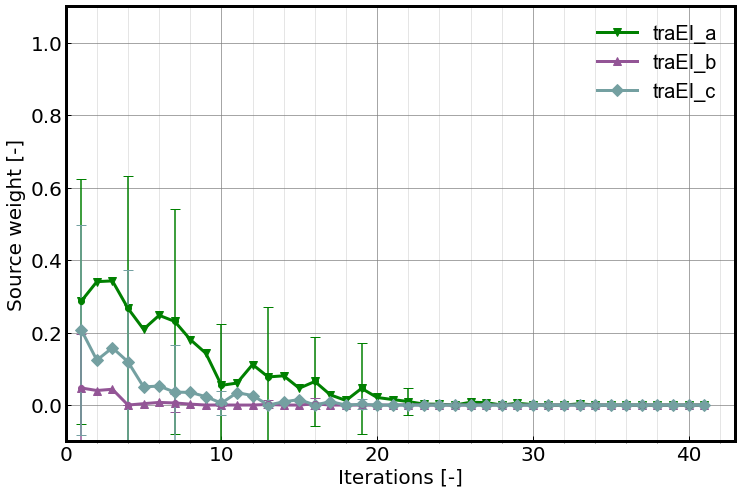

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 创建单个图形
plt.figure(figsize=(12, 8))

fontsize = 20

color_sets =  [  'green', ]
color_1 = (147/255, 85/255, 150/255)
color_2 = (116/255,160/255, 161/255)
color_sets.append( color_1 )
color_sets.append( color_2 )

# 循环导入每个数据集
for i, label in enumerate(label_sets):
    mean_data = mean_datasets[i]
    std_data = std_datasets[i]
    
    x_values = np.arange(0, len(mean_datasets[i])) + init_sample
    
    marker_styles = [ 'v', '^', 'D', 'P', 'x']
    line_styles = ['-', '-', '-', '-', '-', '-', '-']
        
    line, = plt.plot( x_values, mean_datasets[i], label=label, marker=marker_styles[i], markersize=8,
                     linestyle=line_styles[i] ,linewidth= 3 ,color=color_sets[i])  # i  ( 4 - i )

    # 设置每隔五个点标记一次，并标记最后一个点
    markers_num = list(range(0, len(mean_datasets[i]), 3)) 
    plt.errorbar(x_values[markers_num], mean_datasets[i][markers_num], yerr=std_datasets[i][markers_num], 
                 fmt='o', capsize=5,color=line.get_color())
        

#     plt.plot(x_values, mean_data.values, label=label, 
#              marker=marker_styles[idx % len(marker_styles)], 
#              markeredgewidth=2, markerfacecolor='white',  # 这里设置了空心圆圈
#              linestyle=line_styles[idx % len(line_styles)],
#              markevery=2,color=color_sets[i])  # 每隔两个数据点进行标记
    
#     plt.fill_between(x_values, mean_data.values - std_data.values, mean_data.values + std_data.values, alpha=0.3,
#                      color=color_sets[i])


# plt.xlim(left=0, right=30)

plt.xlim(0, iter_num + init_sample + 1 )
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))

plt.ylim(-0.1, 1.1) # (-1, 4)
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(0.2))

# plt.xlabel('Number Of Samples [-]', fontsize=fontsize)
plt.xlabel('Iterations [-]', fontsize=fontsize)
plt.ylabel('Source weight [-]', fontsize=fontsize)

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(5))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))  # 设置主刻度标签的位置,每隔10个单位
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(2))   # 设置副刻度标签的位置,每隔2个单位

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.2))  # 设置主刻度标签的位置,每隔1个单位
plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.2))   # 设置副刻度标签的位置,每隔0.5个单位

plt.grid(True, which='major', linestyle='-', linewidth=1, color='gray', alpha=1)
plt.grid(True, which='minor', linestyle='-', linewidth=1, color='gray', alpha=0.2)

plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

legend = plt.legend(loc='best', fontsize=fontsize,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

# 显示图形
plt.show()


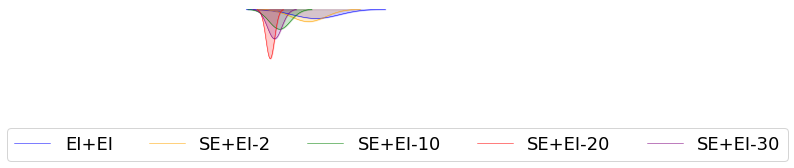

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 定义数据集名称列表
# datasets = ['EI+EI', 'SE+EI-2', 'SE+EI-5', 'SE+EI-10', 'SE+EI-20']

datasets = ['EI+EI', 'SE+EI-2','SE+EI-10', 'SE+EI-20', 'SE+EI-30']
# 定义颜色列表
colors = ['blue', 'orange', 'green', 'red', 'purple']

# 创建单个子图布局
fig, ax = plt.subplots(figsize=(6, 1))

# 在右轴画出正态分布
for mean_data, std_data, dataset, color in zip(mean_datasets, std_datasets, datasets, colors):
    mean_last_point = mean_data.iloc[-1]
    std_last_point = std_data.iloc[-1]
    
    x = np.linspace(mean_last_point - 1 * std_last_point, mean_last_point + 1 * std_last_point, 100)
    ax.plot(x, norm.pdf(x, mean_last_point, std_last_point/3), label=dataset, color=color, linewidth=0.5)
    
    # 添加颜色填充并设置透明度
    ax.fill_between(x, norm.pdf(x, mean_last_point, std_last_point/3), alpha=0.2, color=color)

ax.set_xlim(left=-1)
ax.set_xlim(right=8)

# 隐藏y轴
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

ax.invert_yaxis()

# 隐藏图表边框
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

# 设置x轴位置在底部
ax.xaxis.set_ticks_position('bottom')

# 设置x轴标签
ax.set_xlabel('Value', fontsize=14)

# 隐藏网格线
ax.grid(False)

plt.legend(fontsize=18, loc='lower center', bbox_to_anchor=(0.5, -2), ncol=len(datasets))

plt.show()


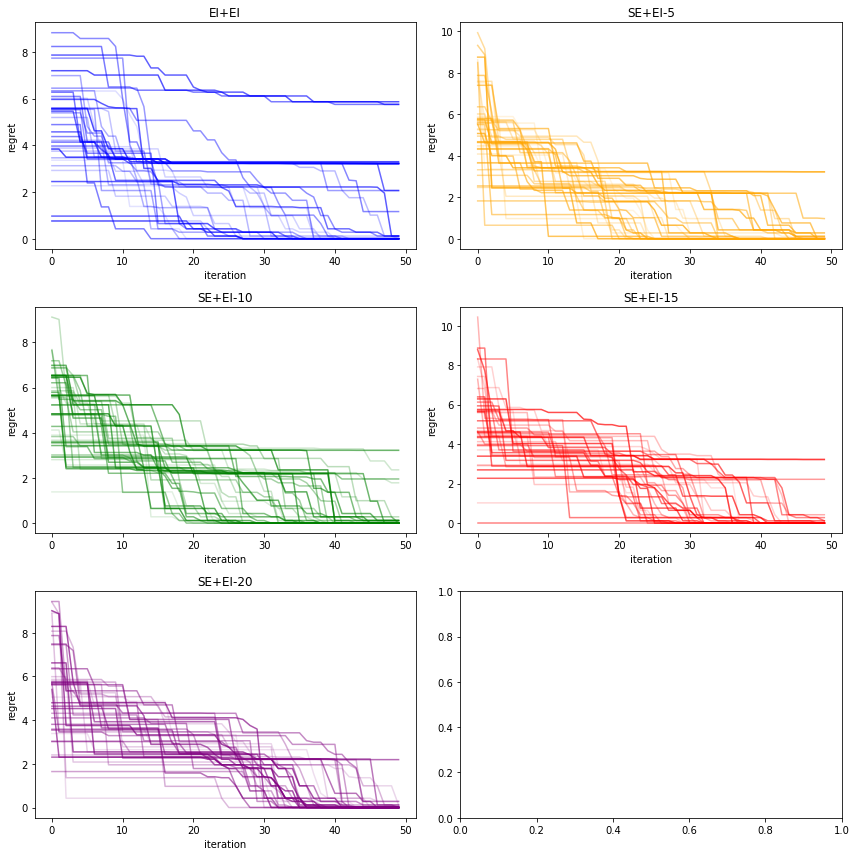

In [6]:
# 定义透明度参数
alpha_increment = 0.6 / len(df0)

# 创建一个包含四个子图的画布
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# 定义线条颜色
colors = ['blue', 'orange', 'green', 'red', 'purple']
# 定义标题
titles = ['EI+EI', 'SE+EI-5','SE+EI-10', 'SE+EI-15', 'SE+EI-20']

# 循环绘制四张子图
for i, (df, title) in enumerate(zip([df0, df1, df2, df3, df4], titles)):
    ax = axs[i // 2, i % 2]  # 获取当前子图的坐标轴
    color = colors[i]  # 获取当前子图的线条颜色

    for j, (index, row) in enumerate(df.iterrows()):
        # 计算当前透明度
        alpha = 0.1 + alpha_increment * (j + 1)
        # 绘制折线图，并设置颜色和透明度
        ax.plot(row.index, row.values, color=color, alpha=alpha)

    ax.set_xlabel('iteration')
    ax.set_ylabel('regret')
    ax.set_title(title)  # 设置子图标题

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

In [34]:
def remove_extreme_rows(df):
    # 找到最后一列
    last_column = df.columns[-1]
    
    # 找到最大值和最小值的索引
    max_indices = df[last_column].nlargest(2).index
    min_indices = df[last_column].nsmallest(2).index
    
    # 删除最大值和最小值所在的行，并重置索引
    df = df.drop(max_indices).reset_index(drop=True)
    df = df.drop(min_indices).reset_index(drop=True)
    
    return df

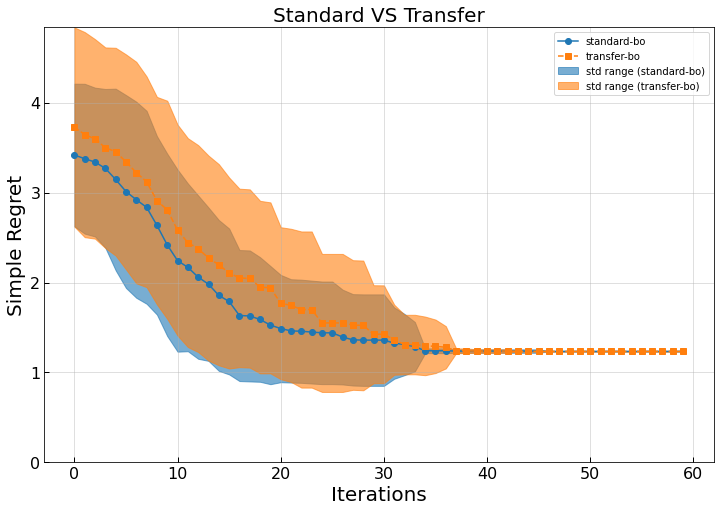

In [35]:
import pandas as pd
import matplotlib.pyplot as plt


folder_path_1 = r'C:\Users\13282\Desktop\papercode\two_stage\result\Goldstein\miny'
file_path_1 = os.path.join(folder_path_1, 'LHS5_SE15_EI60_miny.xlsx')
df_sta = pd.read_excel(file_path_1)


folder_path_2 = r'C:\Users\13282\Desktop\papercode\trasfer\result\Goldstein'
file_path_2 = os.path.join(folder_path_2, 'fz0.1_0.2_20_60_miny.xlsx')
df_tra = pd.read_excel(file_path_2)

# df_tra = df_min_y 

df_sta = remove_extreme_rows(df_sta)
df_tra = remove_extreme_rows(df_tra)
            

# 计算均值和方差
mean_sta = df_sta.mean()
var_sta = df_sta.var()
mean_tra = df_tra.mean()
var_tra = df_tra.var()

# 创建 x 值
x1 = np.arange(len(mean_sta))
x2 = np.arange(len(mean_tra))

# 创建折线图
plt.figure(figsize=(12, 8))

# 绘制 standard-bo 折线
plt.plot(mean_sta , label='standard-bo', marker='o', linestyle='-')

# 绘制 transfer-bo 折线
plt.plot(mean_tra, label='transfer-bo', marker='s', linestyle='--')

# 计算均值加减方差的范围
std_sta = np.sqrt(var_sta)
std_tra = np.sqrt(var_tra)
upper_sta = mean_sta + std_sta
lower_sta = mean_sta - std_sta
upper_tra = mean_tra + std_tra
lower_tra = mean_tra - std_tra

# 绘制方差范围
plt.fill_between(x1, upper_sta, lower_sta, color='C0', alpha=0.6, label='std range (standard-bo)')
plt.fill_between(x2, upper_tra, lower_tra, color='C1', alpha=0.6, label='std range (transfer-bo)')

# 设置Y轴范围从0开始
plt.ylim(0, max(upper_sta.max(), upper_tra.max()))



# 添加标题和坐标轴标签
plt.xlabel('Iterations',fontsize = 20)
plt.ylabel('Simple Regret',fontsize = 20)

plt.title('Standard VS Transfer', fontsize=20)


# 调整坐标轴参数
plt.tick_params(direction='in', length=5, width=1, labelsize=20 * 0.8, grid_alpha=0.5)

# 添加图例
plt.legend()

# 显示图形
plt.grid(True)


plt.show()